# Learning the XOR function with a multilayer perceptron

[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/199px-Colored_neural_network.svg.png" align="right">](https://en.wikipedia.org/wiki/Multilayer_perceptron)

*From Wikipedia, the free encyclopedia*

A [multilayer perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) (MLP) is a feedforward artificial neural network model that maps sets of input data onto a set of appropriate outputs. An MLP consists of multiple layers of nodes in a directed graph, with each layer fully connected to the next one. Except for the input nodes, each node is a neuron (or processing element) with a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training the network. MLP is a modification of the standard linear perceptron and can distinguish data that are not linearly separable.

Consequently, MLP can outperform the perceptron and solve the XOR problem.

In [1]:
import numpy as np
import sklearn.neural_network

import matplotlib.pyplot as plt
from packages.plot import plot_decision_boundary, plot_data
%matplotlib inline

## Load in the data

This is the data for the truth table of the XOR function.

In [2]:
x = np.array([[0.,0.],\
              [0.,1.],\
              [1.,0.],\
              [1.,1.]])
y = np.array([0.,1.,1.,0.])

## Build the model

Create a [MLP object](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) with the following arguments:
* [stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) solver (standard technique in [backpropagation](https://en.wikipedia.org/wiki/Backpropagation))
* one hidden layer with 5 neurons
* 4000 iterations maximum

The rest of the arguments are set to their default values (see documentation).

In [3]:
net = sklearn.neural_network.MLPClassifier(solver='sgd',\
                                           hidden_layer_sizes=(5, ),\
                                           max_iter=4000)

## Train

The `fit` function automatically iterates until convergence or the maximum number of iterations is reached, so you only need to execute the following cell once.

In [12]:
net.fit(x,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=4000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

## Plot the data

The following figure displays the XOR data and the decision boundary of the MLP. This boundary is not linear anymore: it is represented in colors, so that the blue region in the plane corresponds to the features that are classified as 0's and consequently the brown region is classified as 1's.

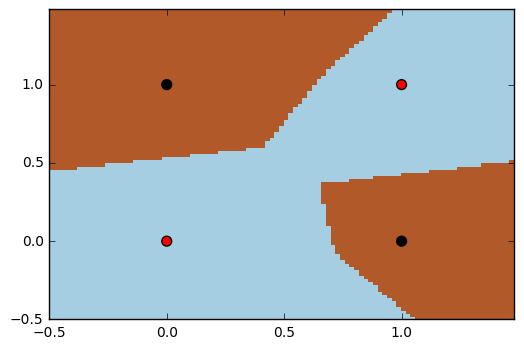

In [13]:
plot_decision_boundary(net,x,y)
plot_data(x, y)

### Success or failure?

There is not a unique solution to this problem. The figure below depicts some possible solutions:

<table border="0">
<tr><td>
<img src="img/xor_1.png" width=200>
</td><td>
<img src="img/xor_2.png" width=200>
</td><td>
<img src="img/xor_3.png" width=200>
</td></tr><tr><td>
<img src="img/xor_4.png" width=200>
</td><td>
<img src="img/xor_5.png" width=200>
</td><td>
<img src="img/xor_6.png" width=200>
</td></tr>
</table>

However, the network not always converge. Sometimes, it can get stuck in a local minima. The algorithm stops but the result is not correct at all. For example:

<table border="0">
<tr><td>
<img src="img/xor_fail_1.png" width=200>
</td><td>
<img src="img/xor_fail_2.png" width=200>
</td><td>
<img src="img/xor_fail_3.png" width=200>
</td></tr>
</table>


## Analysis of the network

Percentage of correct classification of the training data:

In [29]:
net.score(x,y) * 100

100.0

Number of iterations during training:

In [24]:
net.n_iter_

3232

Loss curve: (currently, [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) supports only the [Cross-Entropy loss function](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_error_function_and_logistic_regression))

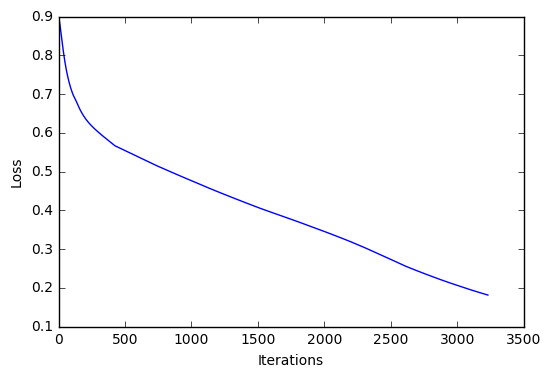

In [27]:
plt.plot(net.loss_curve_);
plt.xlabel('Iterations');
plt.ylabel('Loss');